# Calculate Confidence Interval of PSD

In [1]:
import warnings
warnings.filterwarnings('ignore')  #suppress some warnings about future code changes

import pandas as pd
import netCDF4 as nc
import xarray as xr    
import numpy as np
import datetime          #https://docs.python.org/3/library/datetime.html
#import seaborn as sns
import matplotlib.pyplot as plt
import scipy.signal as sg  #Package for signal analysis
import scipy.ndimage as si #Another package for signal analysis
from scipy.interpolate import interp1d  #for converting cell to grid-centered coordinates
from scipy import stats    #Used for 2D binned statistics
from mpl_toolkits.axes_grid1 import make_axes_locatable #For plotting interior colobars
import cartopy.crs as ccrs
ccrs_proj = ccrs.PlateCarree()
import pyicon as pyic
import glob, os        
#import spectrum

#from scipy import signal, ndimage
from scipy import fft as spfft
from scipy.fft import fft 



-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots


In [48]:
path_data = '/work/mh0033/m300878/model_evaluation/sst/data/vertical/a/'
name_dat = 'data_a30.npy' 

In [49]:
[AA, f_smt, BB, f_sat] = np.load(path_data + name_dat,allow_pickle=True)  


In [55]:
f_smt.shape

(851,)

(1, 1000000.0)

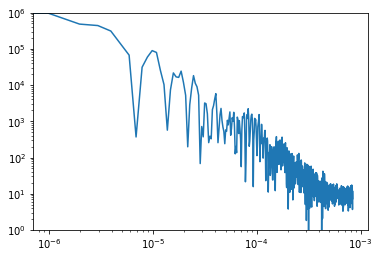

In [75]:
plt.loglog(f_smt, AA[1])
plt.ylim(1, 1e6)

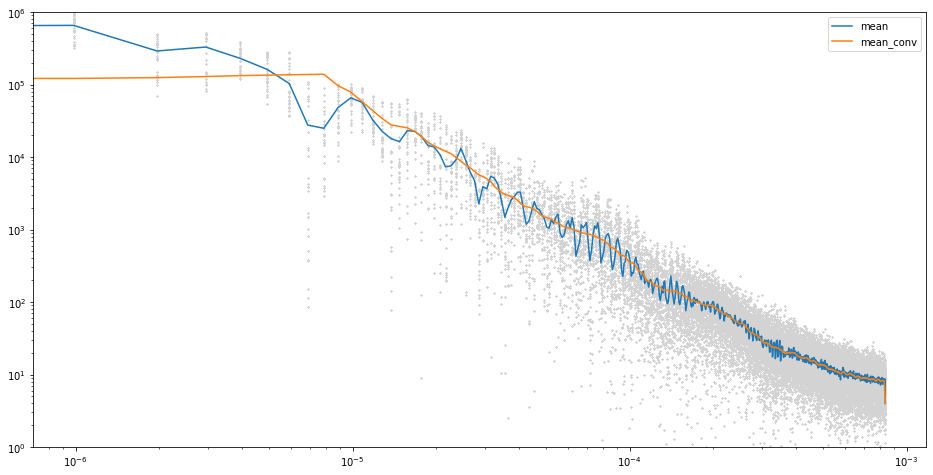

In [68]:
fig = plt.figure(figsize=(16,8))
for ii in np.arange(30):
    plt.scatter(f_smt, AA[ii], marker='x', color='lightgrey', s=2)

AA_mean = np.mean(AA, axis=0)
plt.loglog(f_smt, AA_mean, label='mean')

kernel_size = 15
kernel = np.ones(kernel_size) / kernel_size

AA_mean_conv = np.convolve(AA_mean, kernel, mode='same')
plt.loglog(f_smt, AA_mean_conv, label='mean_conv')

ra,rb = mconf(2*P-1,0.95,'log')

plt.ylim(1, 1e6)
plt.legend()

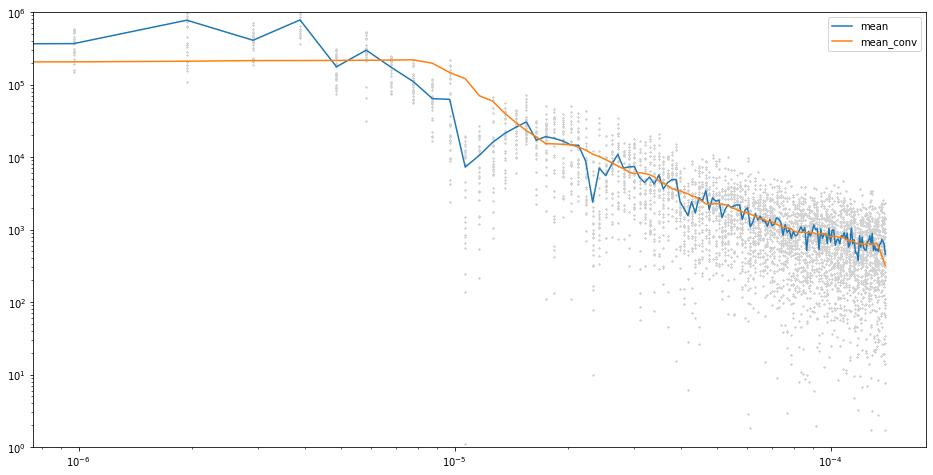

In [72]:
fig = plt.figure(figsize=(16,8))
for ii in np.arange(30):
    plt.scatter(f_sat, BB[ii], marker='x', color='lightgrey', s=2)

BB_mean = np.mean(BB, axis=0)
plt.loglog(f_sat, BB_mean, label='mean')

kernel_size = 15
kernel = np.ones(kernel_size) / kernel_size

BB_mean_conv = np.convolve(BB_mean, kernel, mode='same')
plt.loglog(f_sat, BB_mean_conv, label='mean_conv')



plt.ylim(1, 1e6)
plt.legend()

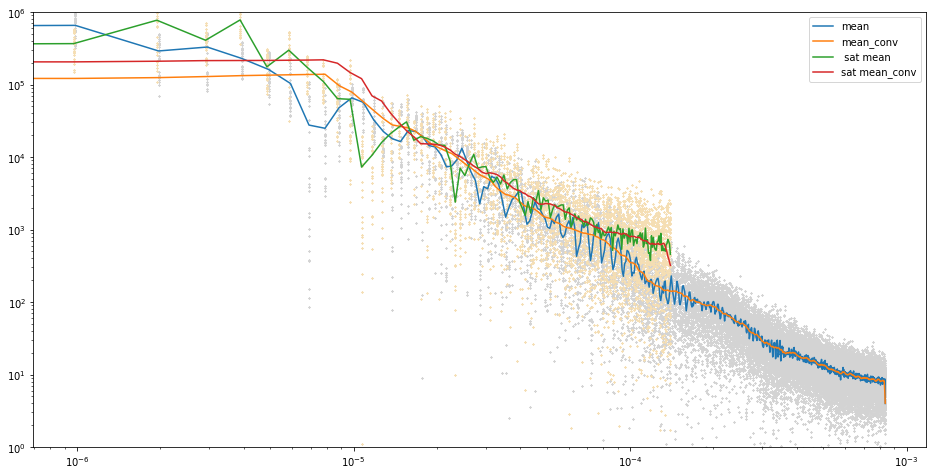

In [73]:
fig = plt.figure(figsize=(16,8))
for ii in np.arange(30):
    plt.scatter(f_smt, AA[ii], marker='x', color='lightgrey', s=2)

AA_mean = np.mean(AA, axis=0)
plt.loglog(f_smt, AA_mean, label='mean')

kernel_size = 15
kernel = np.ones(kernel_size) / kernel_size

AA_mean_conv = np.convolve(AA_mean, kernel, mode='same')
plt.loglog(f_smt, AA_mean_conv, label='mean_conv')

for ii in np.arange(30):
    plt.scatter(f_sat, BB[ii], marker='x', color='wheat', s=2)

BB_mean = np.mean(BB, axis=0)
plt.loglog(f_sat, BB_mean, label=' sat mean')

kernel_size = 15
kernel = np.ones(kernel_size) / kernel_size

BB_mean_conv = np.convolve(BB_mean, kernel, mode='same')
plt.loglog(f_sat, BB_mean_conv, label='sat mean_conv')

plt.ylim(1, 1e6)
plt.legend()

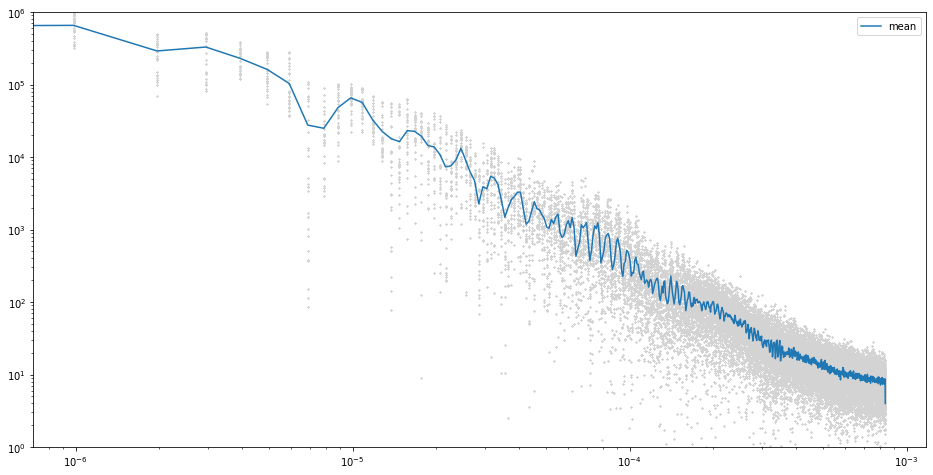

In [66]:
fig = plt.figure(figsize=(16,8))
for ii in np.arange(30):
    plt.scatter(f_smt, AA[ii], marker='x', color='lightgrey', s=2)

AA_mean = np.mean(AA, axis=0)
plt.loglog(f_smt, AA_mean, label='mean')

kernel_size = 10
kernel = np.ones(kernel_size) / kernel_size

AA_mean_ = np.convolve(AA_mean, kernel, mode='same')

plt.ylim(1, 1e6)
plt.legend()

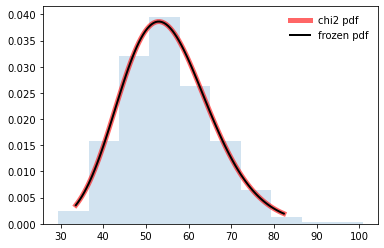

In [43]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
df = 55
mean, var, skew, kurt = chi2.stats(df, moments='mvsk')
x = np.linspace(chi2.ppf(0.01, df),    chi2.ppf(0.99, df), 100)
ax.plot(x, chi2.pdf(x, df), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
rv = chi2(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = chi2.ppf([0.001, 0.5, 0.999], df)
np.allclose([0.001, 0.5, 0.999], chi2.cdf(vals, df))
r = chi2.rvs(df, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [47]:
kurt

array(0.21818182)

In [41]:
chi2.pdf(x, df)

array([0.0035524 , 0.00408459, 0.00467059, 0.00531203, 0.00601007,
       0.00676537, 0.00757803, 0.00844756, 0.00937285, 0.01035215,
       0.01138305, 0.01246251, 0.01358683, 0.01475169, 0.01595219,
       0.01718289, 0.01843783, 0.01971063, 0.02099453, 0.02228247,
       0.02356716, 0.02484118, 0.02609703, 0.02732723, 0.02852443,
       0.02968142, 0.03079128, 0.03184742, 0.03284362, 0.03377416,
       0.03463381, 0.0354179 , 0.03612235, 0.03674373, 0.03727923,
       0.03772671, 0.03808471, 0.03835241, 0.03852963, 0.03861686,
       0.03861515, 0.03852615, 0.03835205, 0.03809554, 0.03775975,
       0.03734823, 0.0368649 , 0.03631397, 0.03569993, 0.03502748,
       0.03430147, 0.03352686, 0.0327087 , 0.03185203, 0.03096191,
       0.03004332, 0.02910113, 0.02814011, 0.02716488, 0.02617986,
       0.02518927, 0.02419712, 0.02320719, 0.02222299, 0.02124781,
       0.02028464, 0.01933623, 0.01840507, 0.01749338, 0.01660312,
       0.015736  , 0.01489349, 0.01407682, 0.01328702, 0.01252